In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf

data = pd.read_csv("/content/GAIL.csv")
data.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,GAIL,EQ,67.80,65.00,70.0,65.0,68.80,68.70,67.91,76055,5.165166e+11,NaN,NaN,NaN
1,2000-01-04,GAIL,EQ,68.70,69.85,72.9,66.0,67.00,66.35,67.29,98097,6.600457e+11,NaN,NaN,NaN
2,2000-01-05,GAIL,EQ,66.35,68.35,68.7,61.1,63.00,63.20,65.24,92690,6.046889e+11,NaN,NaN,NaN
3,2000-01-06,GAIL,EQ,63.20,64.80,67.0,63.0,64.75,64.95,65.55,173654,1.138299e+12,NaN,NaN,NaN
4,2000-01-07,GAIL,EQ,64.95,65.90,65.9,62.0,62.90,62.65,63.76,86590,5.521388e+11,NaN,NaN,NaN


In [5]:
data.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4980,2021-04-26,GAIL,EQ,129.40,130.70,132.00,129.75,129.90,130.00,130.30,6020366,7.844301e+13,25764.0,1797932.0,0.2986
4981,2021-04-27,GAIL,EQ,130.00,130.00,132.80,130.00,132.00,131.55,131.77,11823364,1.557963e+14,63157.0,4634336.0,0.3920
4982,2021-04-28,GAIL,EQ,131.55,132.50,134.00,132.00,133.00,133.35,133.15,6883321,9.165185e+13,30092.0,1535460.0,0.2231
4983,2021-04-29,GAIL,EQ,133.35,134.70,136.40,133.30,134.75,134.80,134.71,9284829,1.250750e+14,35454.0,3062615.0,0.3299
4984,2021-04-30,GAIL,EQ,134.80,133.45,141.45,132.30,137.25,137.20,138.26,21349478,2.951761e+14,70416.0,5417740.0,0.2538


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4985 non-null   object 
 1   Symbol              4985 non-null   object 
 2   Series              4985 non-null   object 
 3   Prev Close          4985 non-null   float64
 4   Open                4985 non-null   float64
 5   High                4985 non-null   float64
 6   Low                 4985 non-null   float64
 7   Last                4985 non-null   float64
 8   Close               4985 non-null   float64
 9   VWAP                4985 non-null   float64
 10  Volume              4985 non-null   int64  
 11  Turnover            4985 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 584.3

In [7]:
# prompt: drop last three columns from data
# no data is in last three sections not used for RNN

data = data.iloc[:, :-3]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        4985 non-null   object 
 1   Symbol      4985 non-null   object 
 2   Series      4985 non-null   object 
 3   Prev Close  4985 non-null   float64
 4   Open        4985 non-null   float64
 5   High        4985 non-null   float64
 6   Low         4985 non-null   float64
 7   Last        4985 non-null   float64
 8   Close       4985 non-null   float64
 9   VWAP        4985 non-null   float64
 10  Volume      4985 non-null   int64  
 11  Turnover    4985 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 467.5+ KB


In [9]:
data = data.sort_values("Date").set_index("Date")

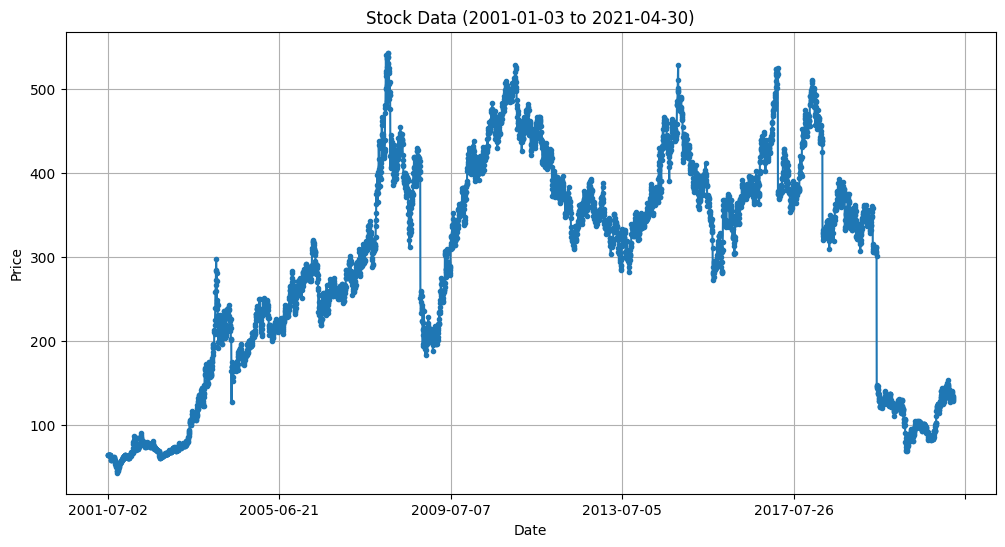

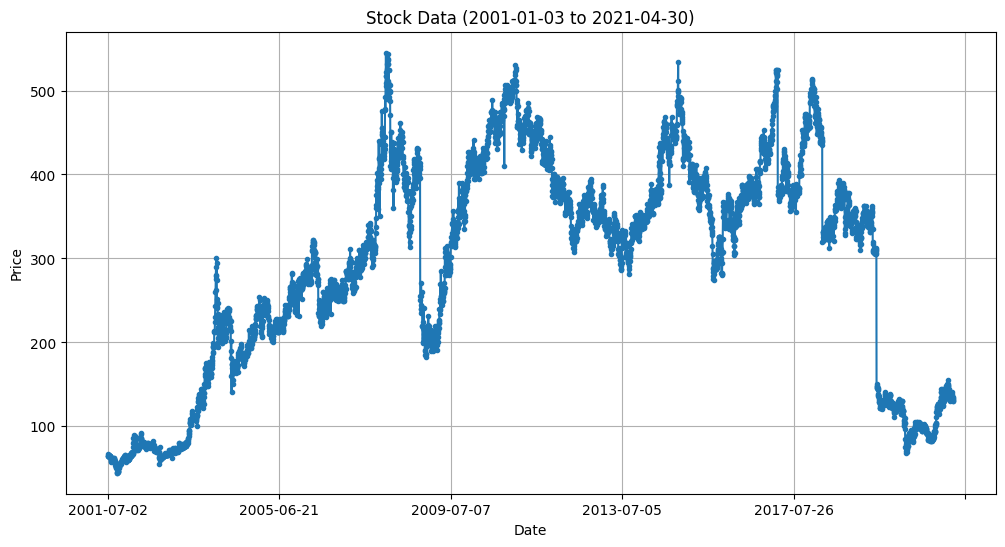

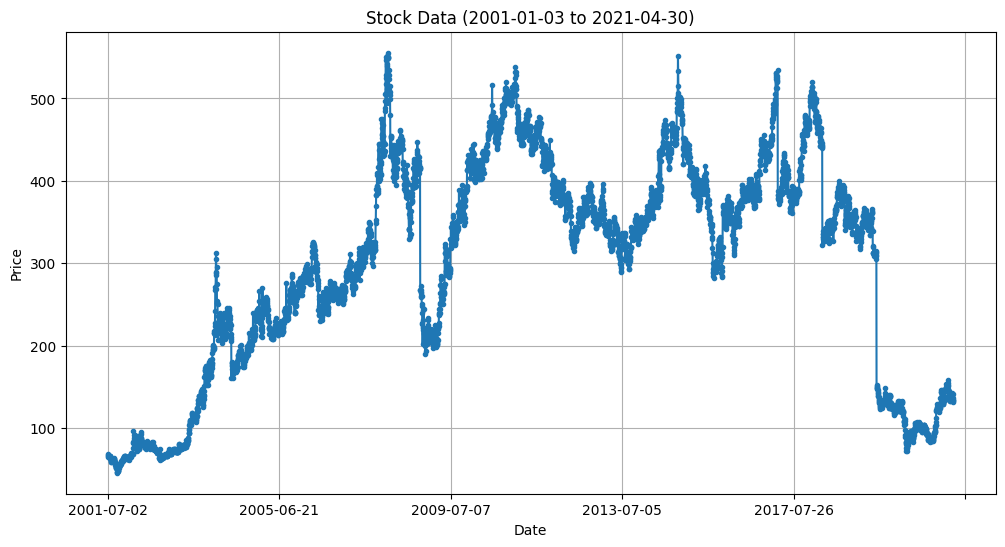

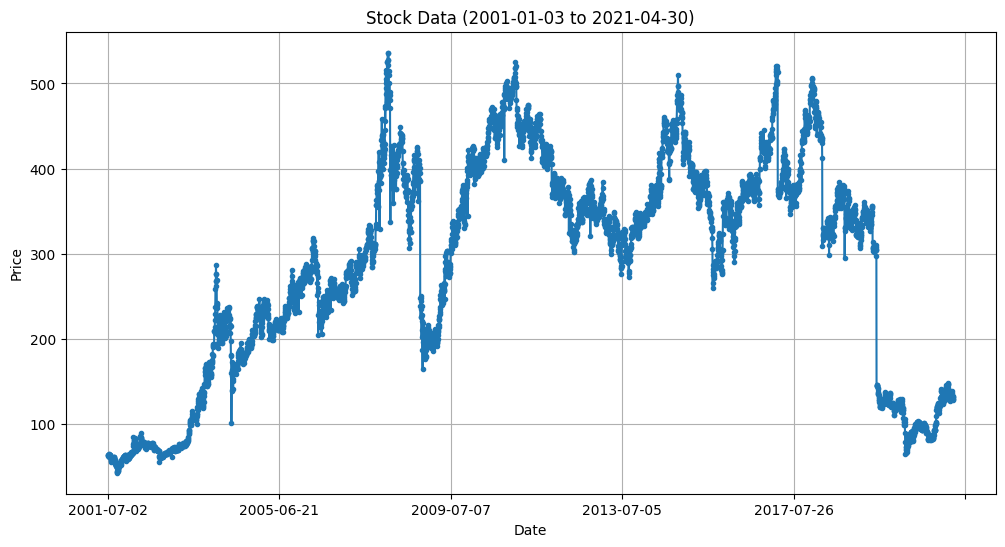

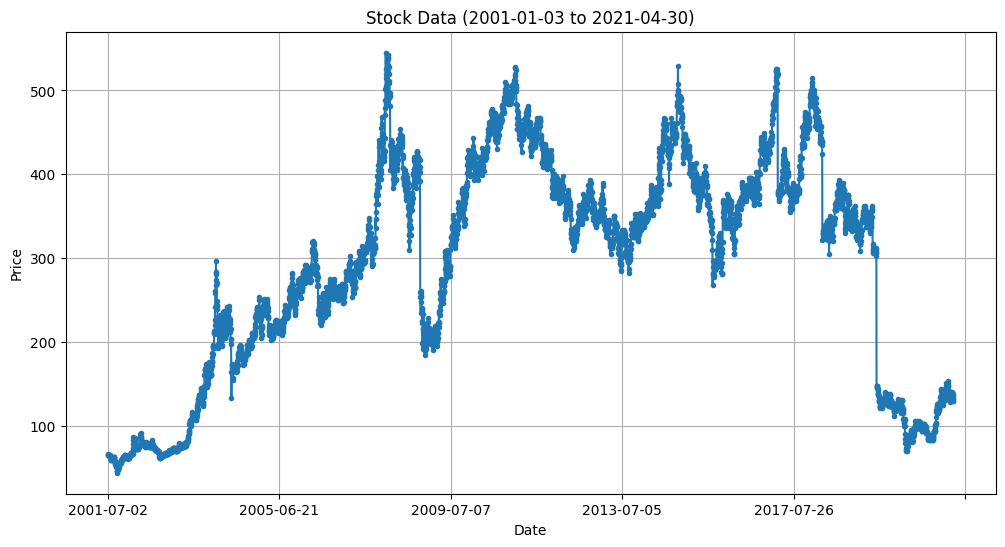

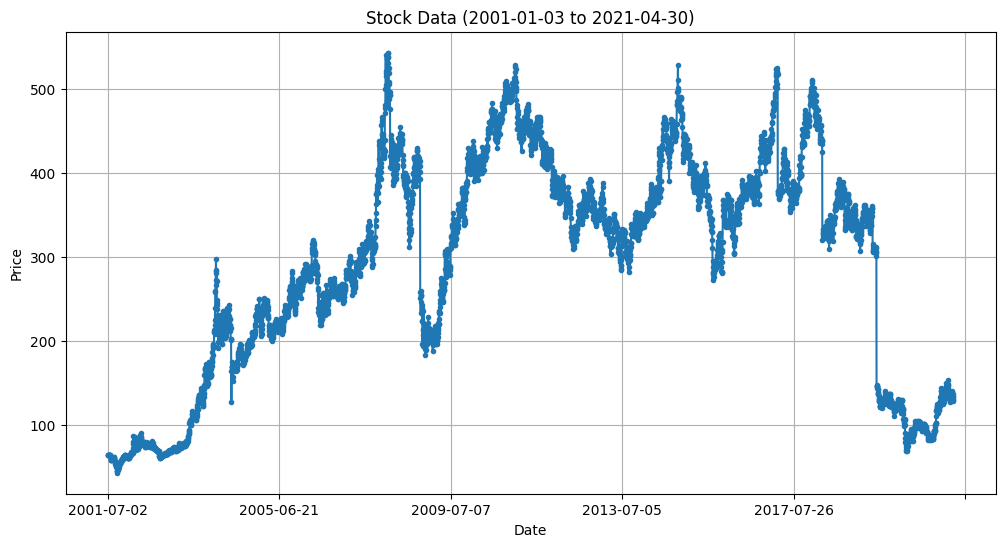

In [10]:
import matplotlib.pyplot as plt
columns_to_plot = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close']
for x in columns_to_plot:
  data["2001-01-03":"2021-04-30"][x].plot(grid=True, marker=".", figsize=(12, 6))
  plt.title("Stock Data (2001-01-03 to 2021-04-30)")
  plt.ylabel("Price")
  plt.show()

<ipython-input-11-2a843232ac77>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df[numeric_cols].resample('M').mean()  # compute the mean for each month


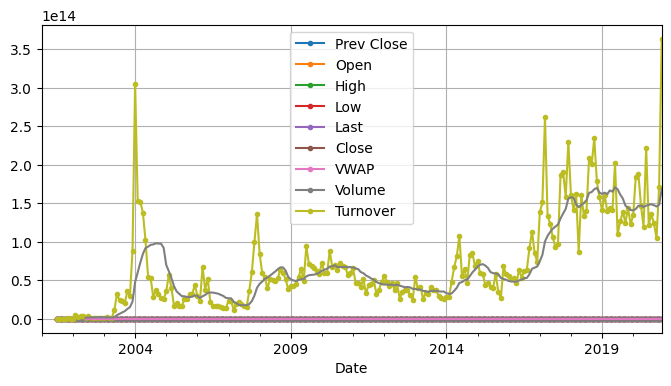

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = data.copy() # Create a copy of 'data' to avoid modifying the original DataFrame

# Assuming 'Date' is not in the last three columns, reset the index to get 'Date' back as a column.
df = df.reset_index()

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index
df = df.sort_values("Date").set_index("Date")

# Now you can proceed with resampling:
period = slice("2001", "2020")

# Select only numeric columns for resampling
numeric_cols = df.select_dtypes(include=['number']).columns
df_monthly = df[numeric_cols].resample('M').mean()  # compute the mean for each month
rolling_average_12_months = df_monthly[period].rolling(window=12).mean()

# ... (rest of your plotting code)

fig, ax = plt.subplots(figsize=(8, 4))
df_monthly[period].plot(ax=ax, marker=".")
rolling_average_12_months.plot(ax=ax, grid=True, legend=False)
#save_fig("long_term_ridership_plot")  # extra code – saves the figure for the book
plt.show()

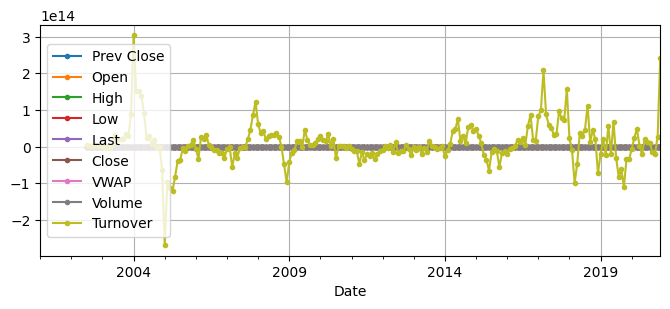

In [12]:
df_monthly.diff(12)[period].plot(grid=True, marker=".", figsize=(8, 3))

plt.show()

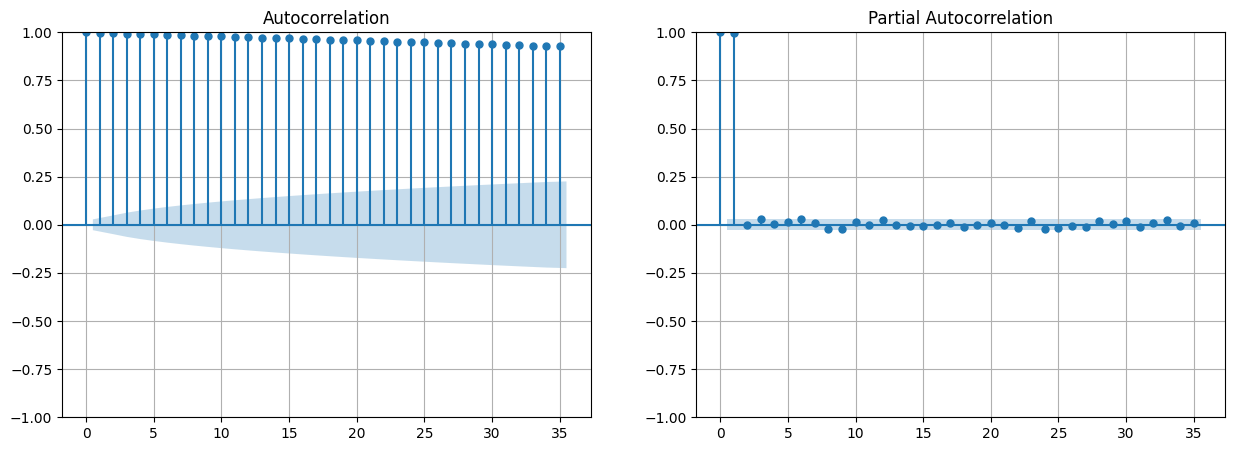

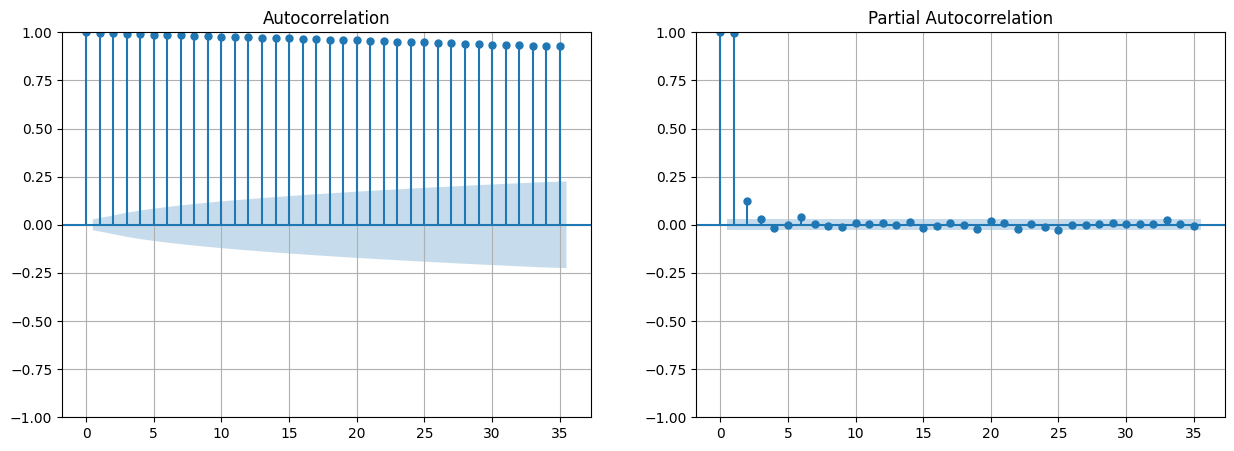

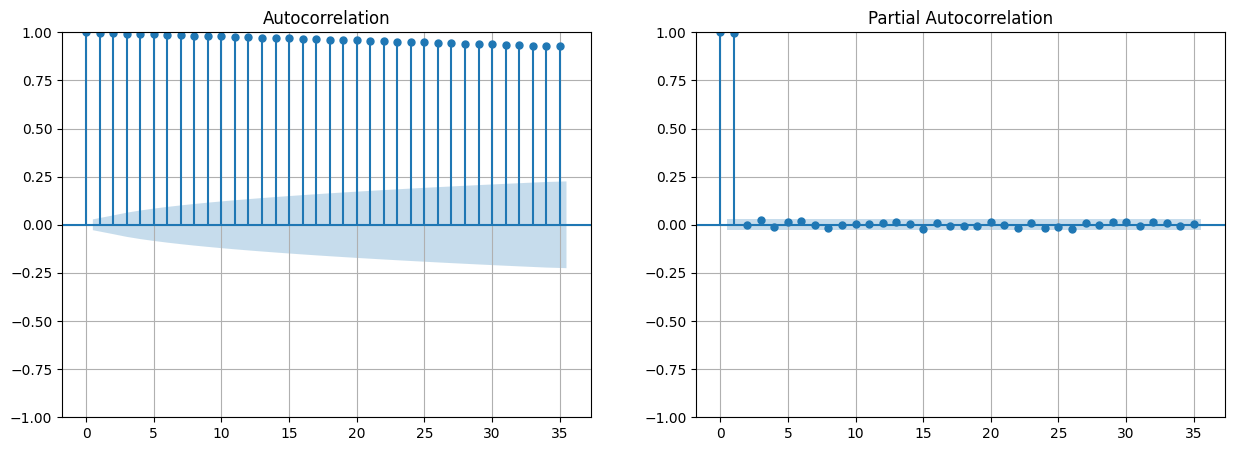

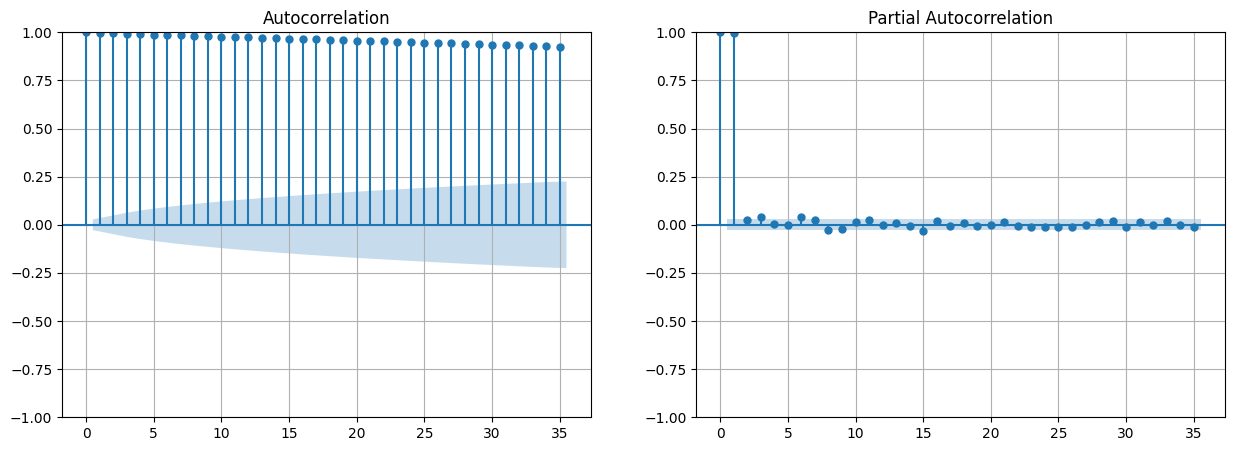

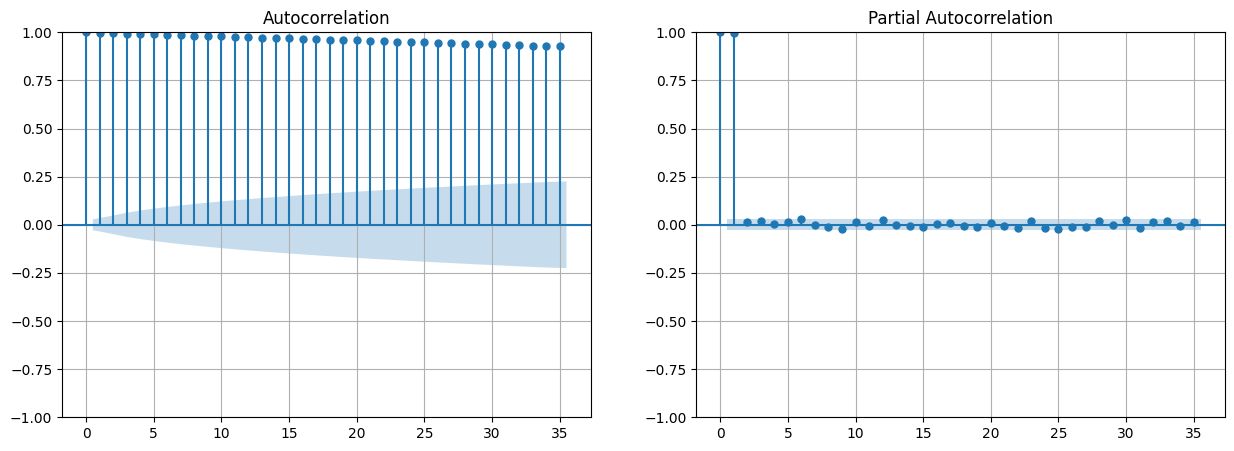

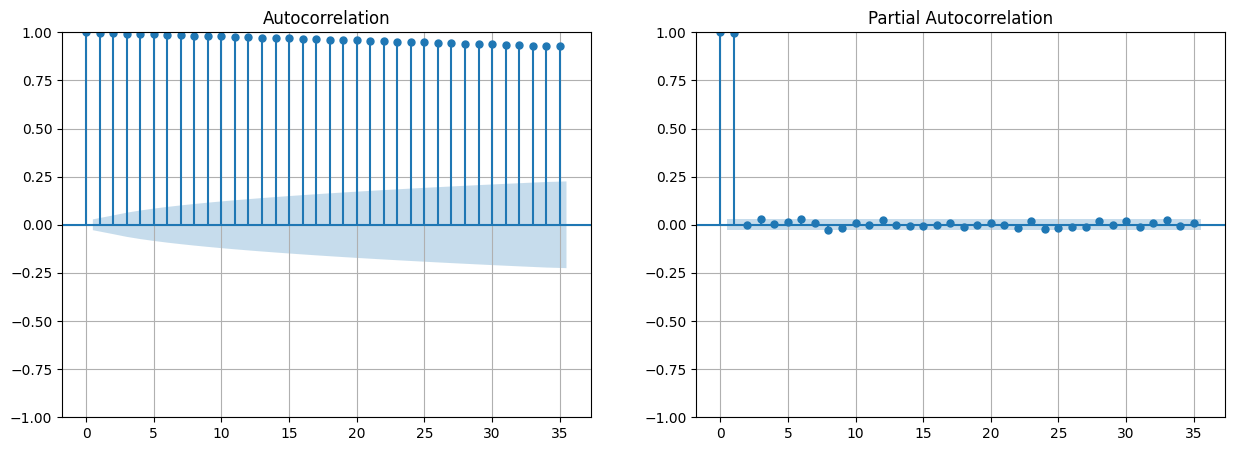

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for x in columns_to_plot:
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
  plot_acf(df[period][x], ax=axs[0], lags=35)
  axs[0].grid()
  plot_pacf(df[period][x], ax=axs[1], lags=35, method="ywm")
  axs[1].grid()
  plt.show()

In [14]:
turnover_train = df[columns_to_plot]["2000-01-03":"2021-04-26"] / 1e6
turnover_valid = df[columns_to_plot]["2019-01":"2021-04-25"] / 1e6
turnover_test = df[columns_to_plot]["2019-06":] / 1e6

In [15]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,,
2000-01-03,GAIL,EQ,67.80,65.00,70.0,65.0,68.80,68.70,67.91,76055,5.165166e+11
2000-01-04,GAIL,EQ,68.70,69.85,72.9,66.0,67.00,66.35,67.29,98097,6.600457e+11
2000-01-05,GAIL,EQ,66.35,68.35,68.7,61.1,63.00,63.20,65.24,92690,6.046889e+11
2000-01-06,GAIL,EQ,63.20,64.80,67.0,63.0,64.75,64.95,65.55,173654,1.138299e+12
2000-01-07,GAIL,EQ,64.95,65.90,65.9,62.0,62.90,62.65,63.76,86590,5.521388e+11


In [16]:
seq_length = 56
tf.random.set_seed(42)  # extra code – ensures reproducibility
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    turnover_train.to_numpy(),
    targets=turnover_train[seq_length:],
    sequence_length=seq_length,
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    turnover_valid.to_numpy(),
    targets=turnover_valid[seq_length:],
    sequence_length=seq_length,
    batch_size=32
)

In [22]:
class MyRNN(tf.keras.layers.Layer):
    def __init__(self, cell, activation="tanh", return_sequences=False, **kwargs): # Accepting cell as argument
        super().__init__(**kwargs)
        self.cell = cell # Using the provided cell
        self.activation = tf.keras.activations.get(activation)
        self.return_sequences = return_sequences
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self, inputs, states):
        # Ensure the input has correct number of features

        # Assuming 'inputs' has shape (batch_size, timesteps, num_features)
        num_features = inputs.shape[-1]  # Get the number of features from the input shape

        # If the cell is expecting a different number of features than provided,
        # add a Dense layer to map the input to the expected shape.
        if num_features != self.cell.units:  # Using self.cell.units
            inputs = tf.keras.layers.Dense(self.cell.units)(inputs)  # Adding the dense layer

        outputs, new_states = self.cell(inputs, states)  # Using self.cell directly
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [30]:
class LNSimpleRNNCell(tf.keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = tf.keras.layers.SimpleRNNCell(units,
                                                             activation=None)
        self.layer_norm = tf.keras.layers.LayerNormalization()
        self.activation = tf.keras.activations.get(activation)

    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [19]:
def fit_and_evaluate(model, train_set, valid_set, learning_rate, epochs=500):
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor="val_mae", patience=50, restore_best_weights=True)
    opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])
    history = model.fit(train_set, validation_data=valid_set, epochs=epochs,
                        callbacks=[early_stopping_cb])
    valid_loss, valid_mae = model.evaluate(valid_set)
    return valid_mae * 1e6

In [38]:
tf.random.set_seed(42)  # extra code – ensures reproducibility
custom_ln_model = tf.keras.Sequential([
    tf.keras.layers.RNN(LNSimpleRNNCell(200), return_sequences=True,
                        input_shape=[None, 5]),
    tf.keras.layers.Dense(14)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'ln_simple_rnn_cell_10', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


In [32]:
def to_seq2seq_dataset(series, seq_length=56, ahead=14, target_col=1,
                       batch_size=32, shuffle=False, seed=None):
    ds = to_windows(tf.data.Dataset.from_tensor_slices(series), ahead + 1)
    # Assuming 'target_col' refers to the column index for the target variable
    ds = to_windows(ds, seq_length).map(lambda S: (S[:, 0], S[:, ahead:, target_col]))
    if shuffle:
        ds = ds.shuffle(8 * batch_size, seed=seed)
    return ds.batch(batch_size)

In [33]:
def to_windows(dataset, length):
    dataset = dataset.window(length, shift=1, drop_remainder=True)
    return dataset.flat_map(lambda window_ds: window_ds.batch(length))

array([[6.7800e-05, 6.5000e-05, 7.0000e-05, 6.5000e-05, 6.8800e-05,
        6.8700e-05],
       [6.8700e-05, 6.9850e-05, 7.2900e-05, 6.6000e-05, 6.7000e-05,
        6.6350e-05],
       [6.6350e-05, 6.8350e-05, 6.8700e-05, 6.1100e-05, 6.3000e-05,
        6.3200e-05],
       ...,
       [1.3440e-04, 1.3300e-04, 1.3420e-04, 1.3045e-04, 1.3300e-04,
        1.3300e-04],
       [1.3300e-04, 1.3180e-04, 1.3400e-04, 1.2850e-04, 1.2980e-04,
        1.2940e-04],
       [1.2940e-04, 1.3070e-04, 1.3200e-04, 1.2975e-04, 1.2990e-04,
        1.3000e-04]])

In [34]:
# prompt: make turnover_train,turnover_valid  to fit vector of  to_seq2seq_dataset function

turnover_train = df[columns_to_plot]["2000-01-03":"2021-04-26"] / 1e6
turnover_valid = df[columns_to_plot]["2019-01":"2021-04-25"] / 1e6

# Convert to NumPy arrays and reshape to match the input expected by to_seq2seq_dataset
turnover_train = turnover_train.to_numpy().reshape(-1, len(columns_to_plot))
turnover_valid = turnover_valid.to_numpy().reshape(-1, len(columns_to_plot))

In [35]:
seq2seq_train = to_seq2seq_dataset(turnover_train, shuffle=True, seed=42)
seq2seq_valid = to_seq2seq_dataset(turnover_valid, shuffle=False)


In [40]:
fit_and_evaluate(custom_ln_model, seq2seq_train, seq2seq_valid,
                 learning_rate=0.33, epochs=5)

Epoch 1/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 2.1824 - mae: 2.5463 - val_loss: 4.1752 - val_mae: 4.6747
Epoch 2/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - loss: 3.7483 - mae: 4.2372 - val_loss: 3.4759 - val_mae: 3.9759
Epoch 3/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 3.8055 - mae: 4.3055 - val_loss: 3.7393 - val_mae: 4.2393
Epoch 4/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 3.7905 - mae: 4.2905 - val_loss: 4.1064 - val_mae: 4.6064
Epoch 5/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 3.8074 - mae: 4.3074 - val_loss: 4.6018 - val_mae: 5.1018
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4759 - mae: 3.9759


3975893.020629883